# Making maps

![All the suburbs in Sydney](all_burbs.png)

We're going to get some shapefiles from data.gov.au, and then we're going to draw some maps

---

You'll need some prequisite libraries.

If you're on a mac, it's easy, just do this:
```
pip3 install pandas shapely fiona descartes pyproj 
pip3 install geopandas
```
You may have some already but pip will be cool with that.

If you are on windows, geopandas is installed differently, so follow these 3 steps:

1. Install Visual CPPD Build Tools with the following link: https://visualstudio.microsoft.com/visual-cpp-build-tools/
2. Restart your computer
3. Open Visual Studio Code again after the restart and copy and paste the following commands into your terminal:

    ```
    pip install wheel
    pip install pipwin
    pip install numpy
    pip install pandas
    pip install shapely
    pip install pyproj
    pip install six
    pip install rtree
    pipwin install gdal
    pipwin install fiona
    pip install descartes
    pip install geopandas
    ```

Copy that whole lot into your terminal, press enter, and it'll sort it out.

We're going to get a shapefile of suburb boundaries from here:

https://data.gov.au/dataset/ds-dga-91e70237-d9d1-4719-a82f-e71b811154c6/details

In [12]:
import os
import geopandas as gpd
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from shapely.geometry import Point
from shapely.geometry import Polygon



shp_file_name = "/Users/stella/1161/star_data/boundaries.shp"
zip_file_name = "boundaries.zip"
web_file_path = (
    "https://discover.data.vic.gov.au/dataset/"
    "boundaries.zip"
)
filepath = "bars-and-pubs-with-patron-capacity.csv"


In [13]:
if os.path.isfile("bars-and-pubs-with-patron-capacity.csv"):
    filepath = "bars-and-pubs-with-patron-capacity.csv"
    print("loading from file")
else:
    filepath = "http://www.osr.nsw.gov.au/sites/default/files/file_manager/penalty_data_set_0.csv"
    print("loading from the internet")
pub_data = pd.read_csv(filepath,skiprows=1)
print("done")

loading from file
done


In [14]:
mel_prop = gpd.read_file("property-boundaries/property-boundaries.shp")

DataSourceError: property-boundaries/property-boundaries.shp: No such file or directory

In [7]:
pub_data.columns

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Number of patrons', 'Longitude', 'Latitude',
       'location'],
      dtype='object')

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

To get a load of shape files from data.gov.au, more specifically, [here](https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries/resource/bf8b5180-fcea-44bd-bd76-af14cc4b0fe0)

In [9]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [10]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

loading from file
done


#### Shapefiles are the format that a lot of GIS tools use.

#### GIS means Geographic Information System

pronounced: _gee eye ess_

not pronounced: _jizz_

In [11]:
burbs = gpd.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(5)

,Census yea,Block ID,Property I,Base prope,Building a,CLUE small,Trading na,Business a,Number of,Longitude,Latitude,location,geometry
3537,2009,228,101450,101450,223-227 Canning Street CARLTON 3053,Carlton,Dan O'Connell Hotel,223-227 Canning Street CARLTON 3053,600,144.973388,-37.793030,"-37.7930304242, 144.97338802894268",POINT (144.973 -37.793)
3997,2014,1104,576024,576023,747-757 Bourke Street DOCKLANDS 3008,Docklands,The Nixon Hotel,749 Bourke Street DOCKLANDS 3008,300,144.947992,-37.819381,"-37.8193808754, 144.94799200964053",POINT (144.948 -37.819)
2146,2011,270,104468,104468,156-292 Grattan Street PARKVILLE 3010,Parkville,University House Club,"Building 112, Gnd & Flr1 , 156-292 Grattan Str...",611,144.961183,-37.796775,"-37.79677546429379, 144.96118327739998",POINT (144.961 -37.797)
3259,2005,43,108069,108069,131-141 Queen Street MELBOURNE 3000,Melbourne (CBD),The Turf Bar & Restaurant,"Unit 1, LwrGround , 131 Queen Street MELBOURNE...",527,144.960543,-37.815497,"-37.815496733626624, 144.96054302812774",POINT (144.961 -37.815)
3045,2022,12,105399,105399,26-32 King Street MELBOURNE VIC 3000,Melbourne (CBD),Clique Bar,Level 1 26 King Street MELBOURNE VIC 3000,222,144.957466,-37.819529,"-37.81952905265, 144.95746565053372",POINT (144.957 -37.820)


There are a bunch of junk columns in there. Normally I'd leave them in, but because we're going to be looking are this data in dataframes, I'll take them out so that it's easier on the eyes.

In [12]:
cols_to_drop = ["VIC_LOCA_1", "VIC_LOCA_3", "VIC_LOCA_4","VIC_LOCA_5","VIC_LOCA_7", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(2)

,Census yea,Block ID,Property I,Base prope,Building a,CLUE small,Trading na,Business a,Number of,Longitude,Latitude,location,geometry
0,2002,11,108972,108972,10-22 Spencer Street MELBOURNE 3000,Melbourne (CBD),Explorers Inn,10-22 Spencer Street MELBOURNE 3000,50,144.955254,-37.820511,"-37.82051068881513, 144.95525416628004",POINT (144.955 -37.821)
1,2002,14,103172,103172,31-39 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Connells Tavern,35 Elizabeth Street MELBOURNE 3000,350,144.964322,-37.817426,"-37.81742610667125, 144.964321660097",POINT (144.964 -37.817)


Only uncomment this if you've got a fast computer and a lot of time!

It makes the map at the top of this file.

In [81]:
# burbs.geometry.plot()

Let's pull out a single row, a single suburb, and look at it.

In [13]:
a = burbs.iloc[0]
print(a)

Census yea                                         2002
Block ID                                             11
Property I                                       108972
Base prope                                       108972
Building a          10-22 Spencer Street MELBOURNE 3000
CLUE small                              Melbourne (CBD)
Trading na                                Explorers Inn
Business a          10-22 Spencer Street MELBOURNE 3000
Number of                                            50
Longitude                                    144.955254
Latitude                                     -37.820511
location         -37.82051068881513, 144.95525416628004
geometry      POINT (144.95525416628 -37.8205106888151)
Name: 0, dtype: object


When we plot a geopandas polygon\* it actually draws it, rather than showing the textual information, which is nice.

\* it's acutally a Shapely polygon I think.

---

If we want to measure some distances, we need _points_. The distance between two shapes is ambiguous.

The easiest way to do this is to get the centroid of the polygon.

In [15]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(2)

,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry,centroid
87,lcpefrQzQd5UBcA,loc7a389af5c5f0,2023-06-26,Avoca,Gazetted Locality,VIC,"POLYGON ((143.406 -37.040, 143.407 -37.039, 14...",POINT (143.47012 -37.08200)
790,lcpcPHiyZXT1sjD,loc2946717827d5,2023-12-10,Dreeite,Gazetted Locality,VIC,"POLYGON ((143.428 -38.169, 143.442 -38.148, 14...",POINT (143.50503 -38.15562)


And we can plot this nicely as a map. Note that this is different to doing a `scatter` of lat and long because it's aware that they're spatially related; no squishing.

In [44]:
print(pub_data.columns)

Index(['Census year', 'Block ID', 'Property ID', 'Base property ID',
       'Building address', 'CLUE small area', 'Trading name',
       'Business address', 'Number of patrons', 'Longitude', 'Latitude',
       'location'],
      dtype='object')


In [52]:
from shapely.geometry import shape

In [53]:
Longitude_col = 'Longitude'  
Latitude_col = 'Latitude'

In [54]:
if Longitude_col in pub_data.columns and Latitude_col in pub_data.columns:
    pub_data['geometry'] = pub_data.apply(lambda row: Point(row[Longitude_col], row[Latitude_col]), axis=1)
    pub_gdf = gpd.GeoDataFrame(pub_data, geometry='geometry', crs="EPSG:4326")
    print(pub_gdf.head())
else:
    print("Longitude or Latitude columns are missing in the data.")

   Census year  Block ID  Property ID  Base property ID  \
0         2002        11       108972            108972   
1         2002        14       103172            103172   
2         2002        15       103944            103944   
3         2002        16       103938            103938   
4         2002        17       103925            103925   

                        Building address  CLUE small area     Trading name  \
0    10-22 Spencer Street MELBOURNE 3000  Melbourne (CBD)    Explorers Inn   
1  31-39 Elizabeth Street MELBOURNE 3000  Melbourne (CBD)  Connells Tavern   
2   277-279 Flinders Lane MELBOURNE 3000  Melbourne (CBD)         De Biers   
3       187 Flinders Lane MELBOURNE 3000  Melbourne (CBD)    Adelphi Hotel   
4   121-123 Flinders Lane MELBOURNE 3000  Melbourne (CBD)           Velour   

                                    Business address  Number of patrons  \
0                10-22 Spencer Street MELBOURNE 3000                 50   
1                 35 Eliza

In [55]:
output_shapefile = "/Users/stella/1161/star_data/my map/GDA94/vic_localities.shp"

In [56]:
pub_gdf.to_file(output_shapefile, driver='ESRI Shapefile')

/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_17725/1236218810.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pub_gdf.to_file(output_shapefile, driver='ESRI Shapefile')
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/geopandas.py:514: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  has_z_arr = geometry[geometry.notna() & (~geometry.is_empty)].has_z
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/

In [57]:
pub_gdf = gpd.read_file("/Users/stella/1161/star_data/my map/GDA94/vic_localities.shp")

In [58]:
print(pub_gdf.crs)

EPSG:4326


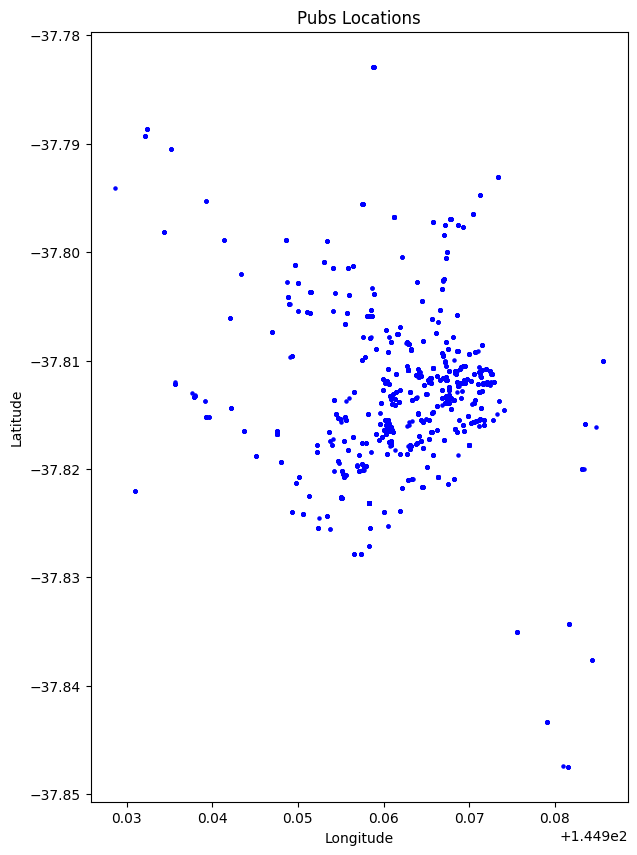

In [59]:
pub_gdf.plot(marker='o', color='blue', markersize=5)

plt.title("Pubs Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [60]:

pub_gdf.columns = pub_gdf.columns.str.strip()
print(pub_gdf.columns)

Index(['Census yea', 'Block ID', 'Property I', 'Base prope', 'Building a',
       'CLUE small', 'Trading na', 'Business a', 'Number of', 'Longitude',
       'Latitude', 'location', 'geometry'],
      dtype='object')


In [61]:
CLUE_small_polygons = pub_gdf.groupby('CLUE_small')['geometry'].apply(lambda x: Polygon(x.unary_union))


KeyError: 'CLUE_small'

In [28]:
print(pub_gdf.head())

   Census year  Block ID  Property ID  Base property ID  \
0         2002        11       108972            108972   
1         2002        14       103172            103172   
2         2002        15       103944            103944   
3         2002        16       103938            103938   
4         2002        17       103925            103925   

                        Building address  CLUE small area     Trading name  \
0    10-22 Spencer Street MELBOURNE 3000  Melbourne (CBD)    Explorers Inn   
1  31-39 Elizabeth Street MELBOURNE 3000  Melbourne (CBD)  Connells Tavern   
2   277-279 Flinders Lane MELBOURNE 3000  Melbourne (CBD)         De Biers   
3       187 Flinders Lane MELBOURNE 3000  Melbourne (CBD)    Adelphi Hotel   
4   121-123 Flinders Lane MELBOURNE 3000  Melbourne (CBD)           Velour   

                                    Business address  Number of patrons  \
0                10-22 Spencer Street MELBOURNE 3000                 50   
1                 35 Eliza

In [174]:
burbs = burbs.to_crs(epsg=32755)



In [175]:
pub_gdf = pub_gdf.to_crs(epsg=32755)

In [176]:
combined_gdf = gpd.sjoin(pub_gdf, burbs, how="inner", op="within")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [200]:
print(combined_gdf.head())

Empty GeoDataFrame
Columns: [Census year, Block ID, Property ID, Base property ID, Building address, CLUE small area, Trading name, Business address, Number of patrons, Longitude, Latitude, location, geometry, index_right, LC_PLY_PID, LOC_PID, DT_CREATE, LOC_NAME, LOC_CLASS, STATE]
Index: []


In [209]:
pub_gdf['centroid'] = pub_gdf.geometry.centroid

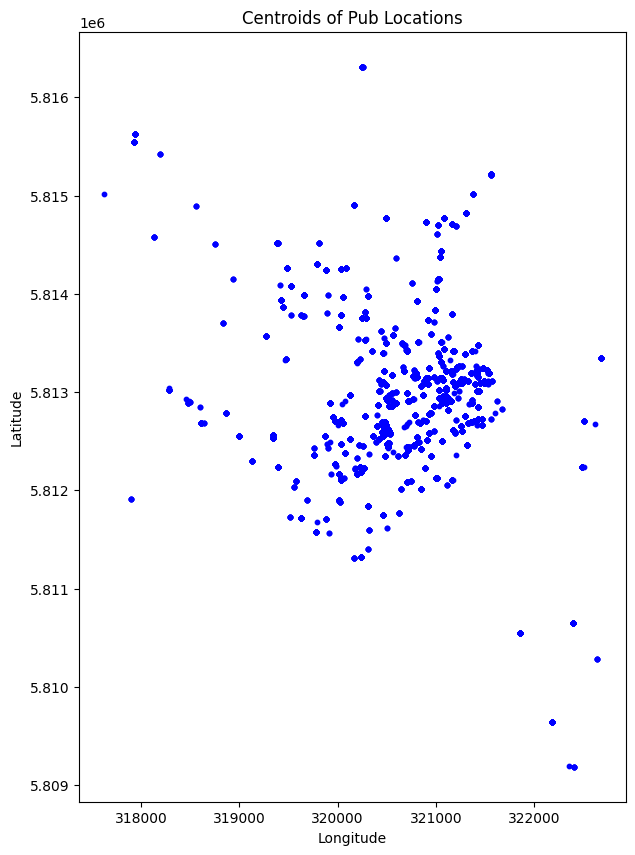

In [218]:
fig, ax = plt.subplots(figsize=(10, 10))
pub_gdf.centroid.plot(ax=ax, color='blue', marker='o', markersize=10)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Centroids of Pub Locations')

plt.show()

<Axes: >

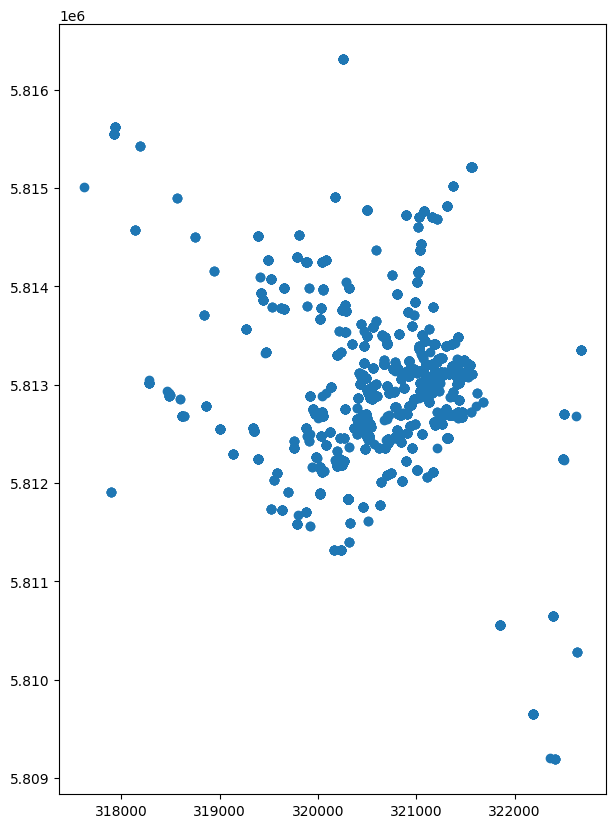

In [205]:
pub_gdf.centroid.plot()



POINT (146.76407857089887 -37.021339124285426)


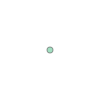

In [28]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

Let's make a new point that's on the UNSW campus. We need to use shapely to do this.

Then calculate the distance from that point to the centroid of each suburb.

In [29]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

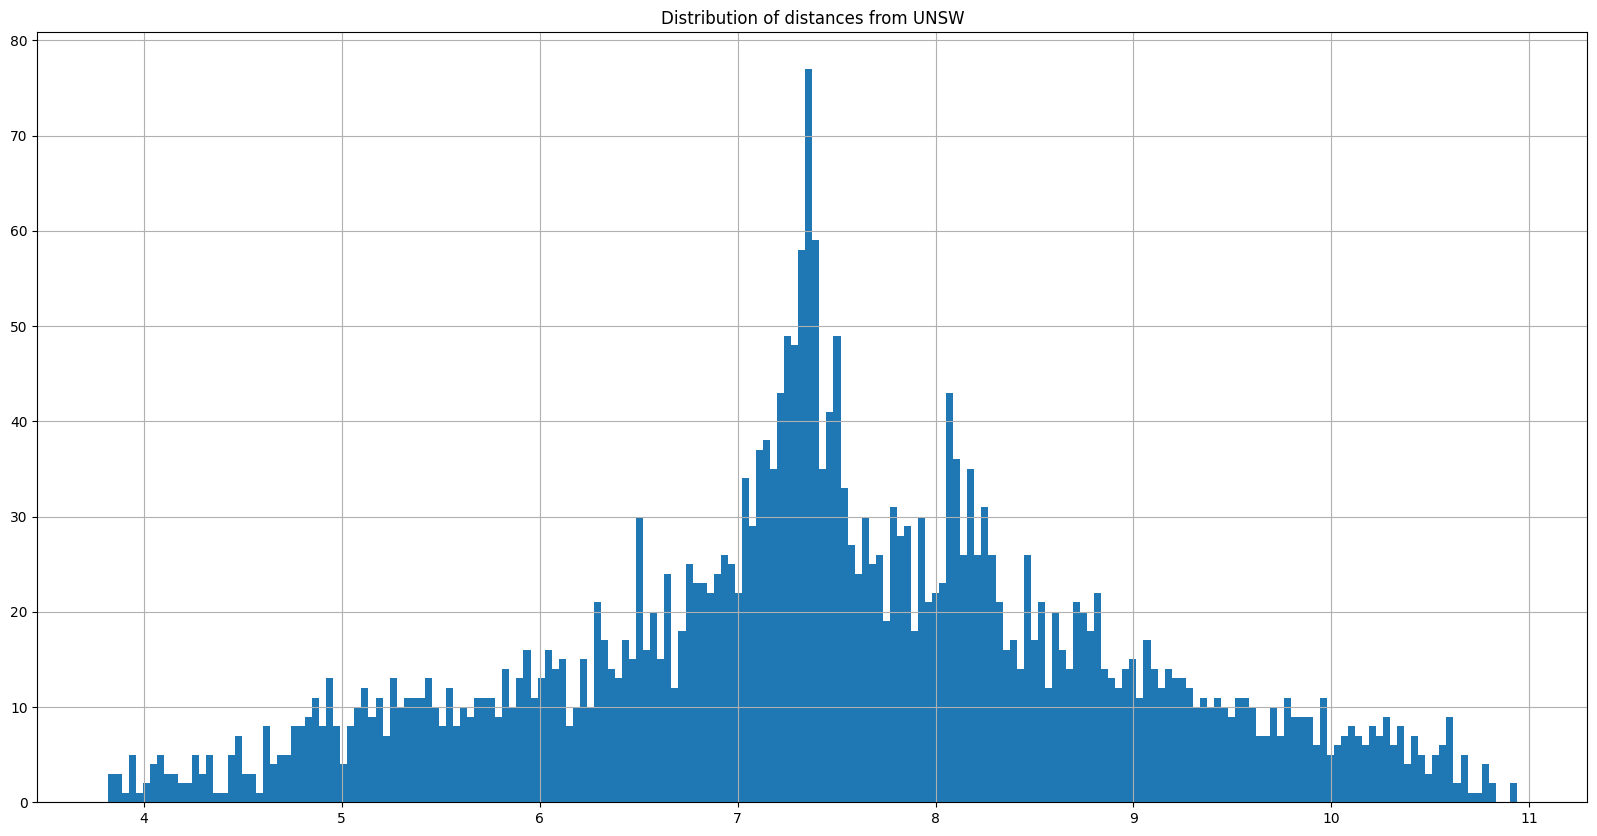

In [30]:
burbs.distance_from_UNSW.hist(bins=200)
plt.title("Distribution of distances from UNSW");

This gives distance in whole numbers of lat long I think, i.e. degrees!

Not really sure what to do with that, but let's get rid of everything above 0.2 and see what we can plot:

In [97]:
print("Burbs Data:")
print(burbs.head())
print("Burbs CRS:", burbs.crs)

Burbs Data:
        LC_PLY_PID          LOC_PID  DT_CREATE    LOC_NAME          LOC_CLASS  \
0  lcp-ejVyte1DxXx  locb0dcb52a6b55 2023-06-26    Abbeyard  Gazetted Locality   
1  lcp386f2bcf9bce  locb9872f35df41 2021-06-24  Abbotsford  Gazetted Locality   
2  lcprFRP2-cPMfr5  loc8123ed12ea8d 2023-03-21  Aberfeldie  Gazetted Locality   
3  lcpj3KHi-vakgFj  loc1eb4a229104a 2023-12-10   Aberfeldy  Gazetted Locality   
4  lcpoO-hq-yZZASg  locb17be87767e1 2023-12-10     Acheron  Gazetted Locality   

  STATE                                           geometry  \
0   VIC  POLYGON ((-9828010.274 11537863.964, -9828010....   
1   VIC  POLYGON ((-9828015.079 11537862.717, -9828015....   
2   VIC  POLYGON ((-9828015.313 11537862.919, -9828015....   
3   VIC  POLYGON ((-9828011.487 11537862.189, -9828011....   
4   VIC  POLYGON ((-9828013.094 11537863.690, -9828013....   

                      centroid  distance_from_CBD  
0  POINT (146.76408 -37.02134)       1.165210e+07  
1  POINT (144.99970 -37.

In [75]:
melbourne_cbd = Point(144.9631, -37.8136)  

cbd_gdf = gpd.GeoDataFrame([1], geometry=[melbourne_cbd], crs="EPSG:4326")

burbs = burbs.to_crs(epsg=32755)  
cbd_gdf = cbd_gdf.to_crs(epsg=32755)





In [98]:
print("Burbs CRS after conversion:", burbs.crs)
print("CBD CRS after conversion:", cbd_gdf.crs)

Burbs CRS after conversion: EPSG:32755
CBD CRS after conversion: EPSG:32755


In [76]:
cbd_point = cbd_gdf.geometry.iloc[0]
burbs['distance_from_CBD'] = burbs.geometry.apply(lambda x: x.distance(cbd_point))


In [99]:
print(burbs[['distance_from_CBD']].head())

   distance_from_CBD
0       1.165210e+07
1       1.165211e+07
2       1.165211e+07
3       1.165210e+07
4       1.165210e+07


In [100]:
close_burbs = burbs[burbs['distance_from_CBD'] < 10000]


In [101]:
print("Close Burbs Data:")
print(close_burbs.shape)

Close Burbs Data:
(0, 9)


/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_9354/4172864943.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  close_burbs.plot()


<Axes: >

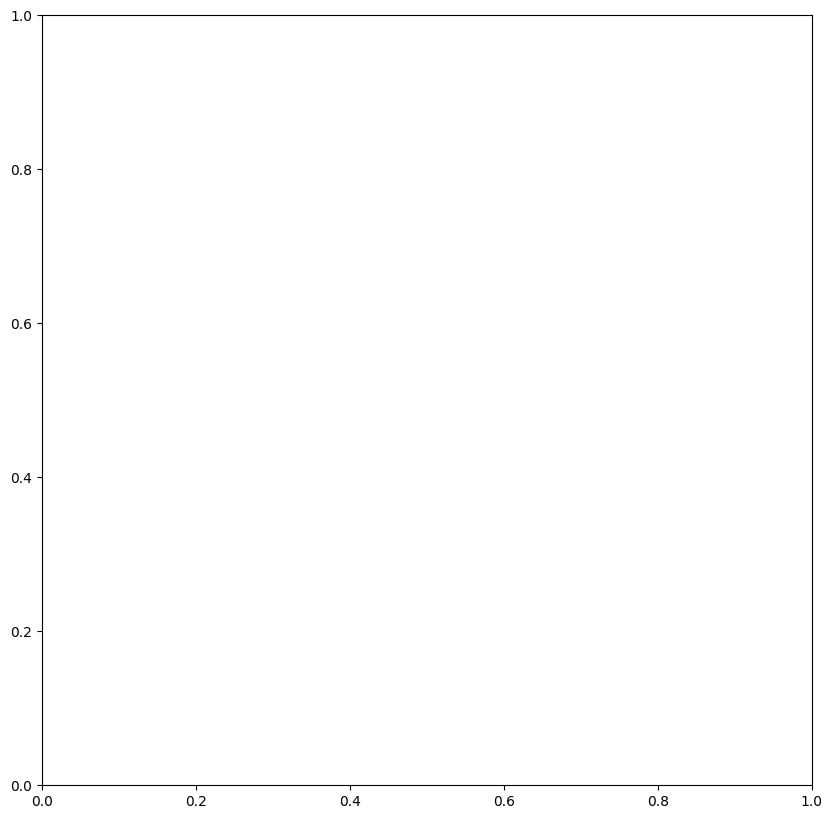

In [106]:
close_burbs = burbs[burbs.distance_from_CBD < 10000]
close_burbs.plot()

We can simplify shapes in a few ways:

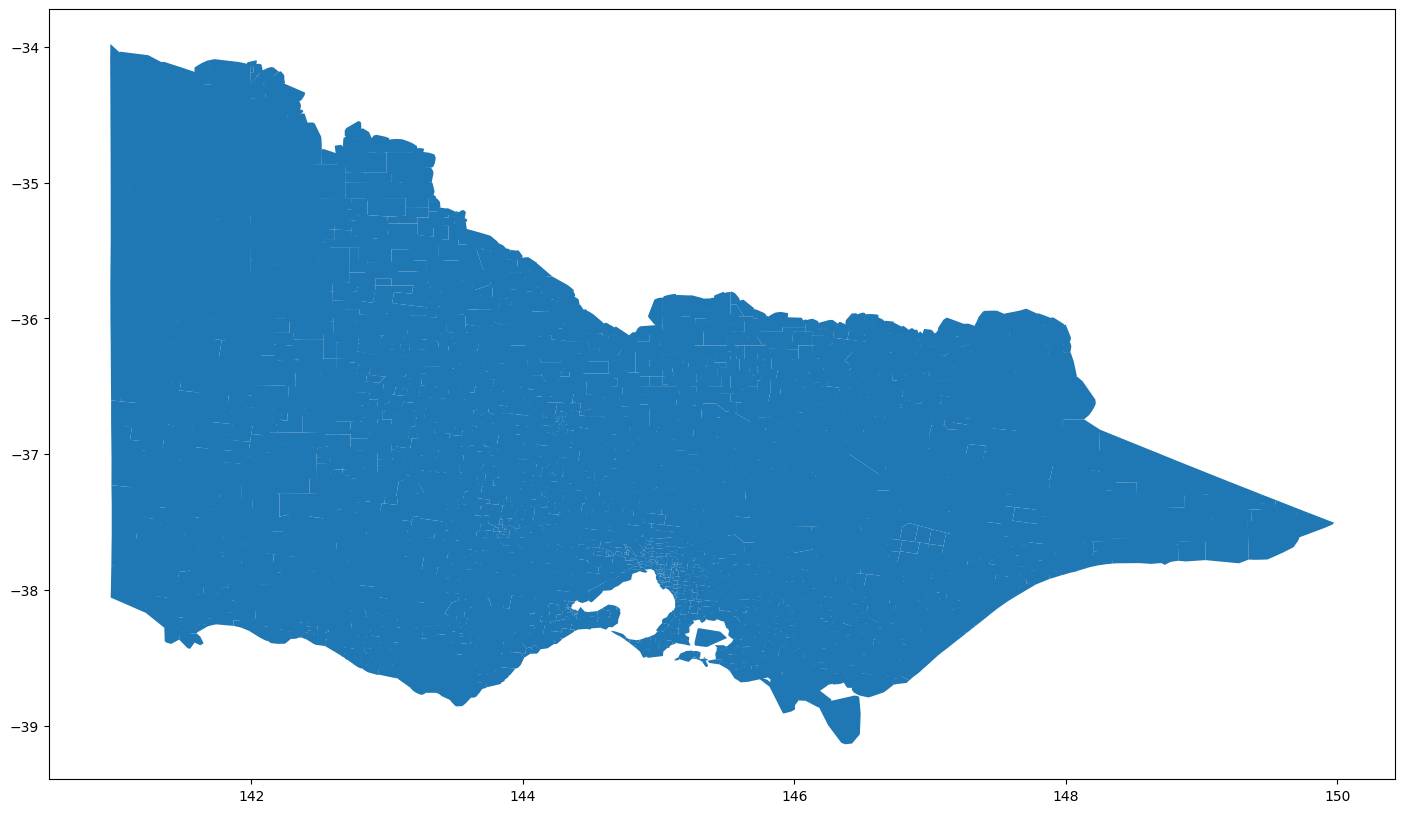

In [37]:
close_burbs.geometry.convex_hull.plot();

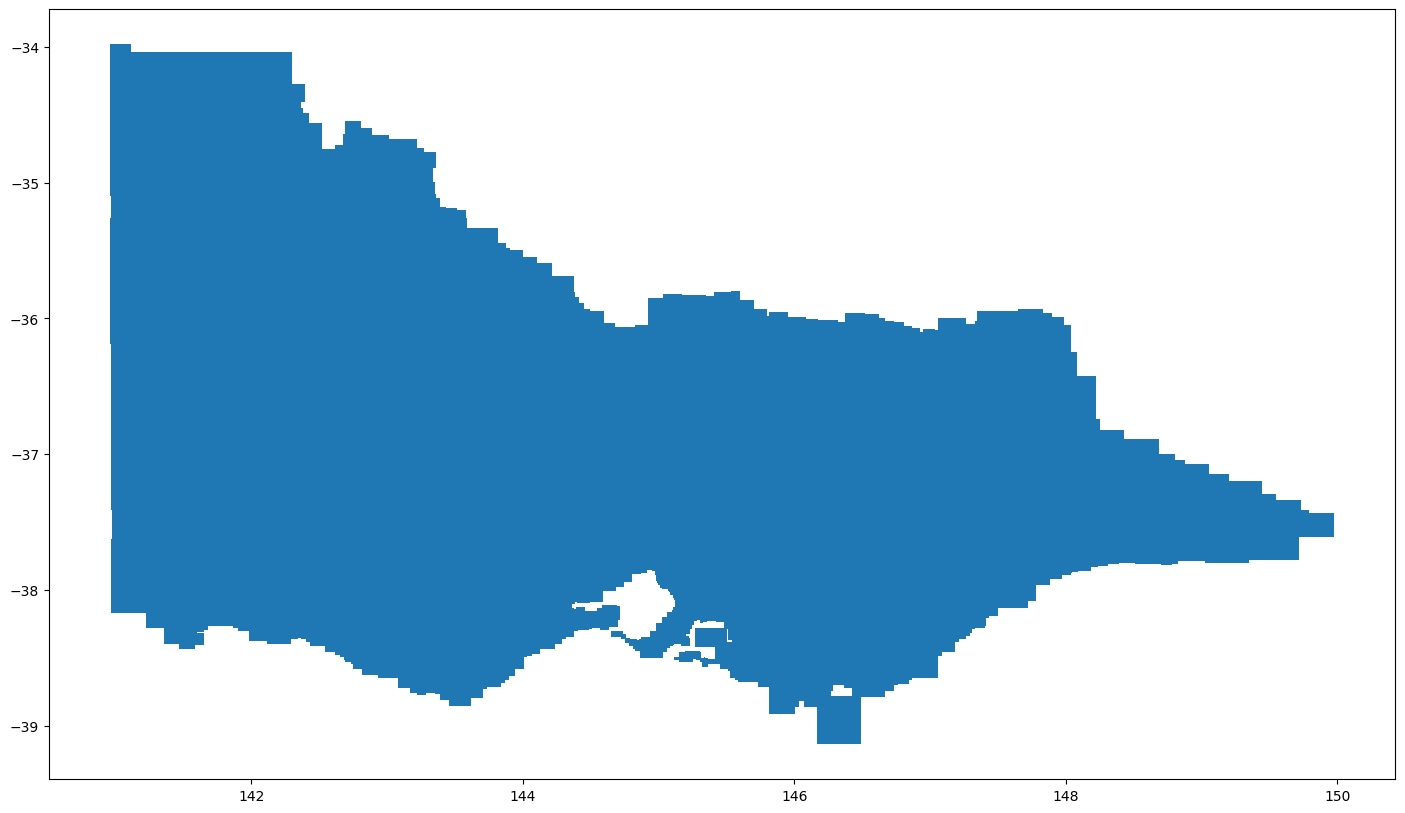

In [38]:
close_burbs.geometry.envelope.plot();

![](http://www.personal.kent.edu/~rmuhamma/Compgeometry/MyCG/Gifs-CompGeometry/ch2.gif)

Convex hulls are a useful aproximation if you want to do fast calculations.

You can use this to speed up calculations sometimes. It goes radius, bounding box, convex hull, complex polygon. I.e. if the points are not within radius_1 + radius_2 of each other, there's no point doing any other checks.

Often it's faster to do all of these checks in order, flowing from one to the next, than it is to just go straight to the most complex. But that depends on how much effort you can be bothered to put in.

What about putting labels on the map?

/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_9354/1264674701.py:2: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot()


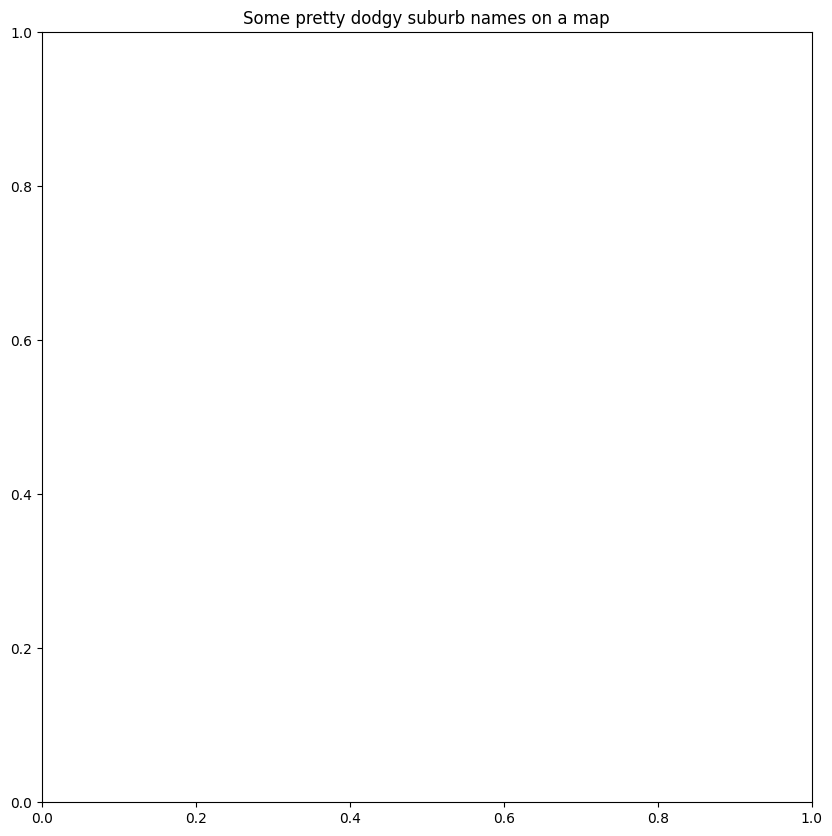

In [108]:
really_close_burbs = burbs[burbs.distance_from_CBD < 300]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
#     print(idx, row)
#     print("annotation", row.VIC_LOCA_2)
#     print("coords", row.centroid.coords, 
#           "tup", tuple(row.centroid.coords), 
#           "zero", tuple(row.centroid.coords)[0])
    plt.annotate(text=row.LOC_NAME, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center')
plt.title("Some pretty dodgy suburb names on a map");

We often want to be able to tell if a point is in a suburb or not. We'd do that with a polygon inclusion test.

![](http://www.geeksforgeeks.org/wp-content/uploads/polygon31.png)

[How to check if a given point lies inside or outside a polygon?](http://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/)

Luckily we've got one built in!

In [110]:
print(right_here)
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


This might actually be a case where a `lambda` is a good idea:

In [111]:
in_this_burb = really_close_burbs[really_close_burbs.geometry.apply(lambda x: right_here.within(x))]
in_this_burb

""


This is useful if you need to get the suburb name of some points. You'd check each point to see if it's in each suburb, and if it is, you've got it. Careful though, that's a O(n²) job.

How about colouring suburbs according to some kind of scalar value?

[That's called a _chloropleth_](http://geopandas.readthedocs.io/en/latest/mapping.html?highlight=color#chloropleth-maps)

/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_9354/527919385.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.plot(column='distance_from_CBD', cmap='cool', legend=True);


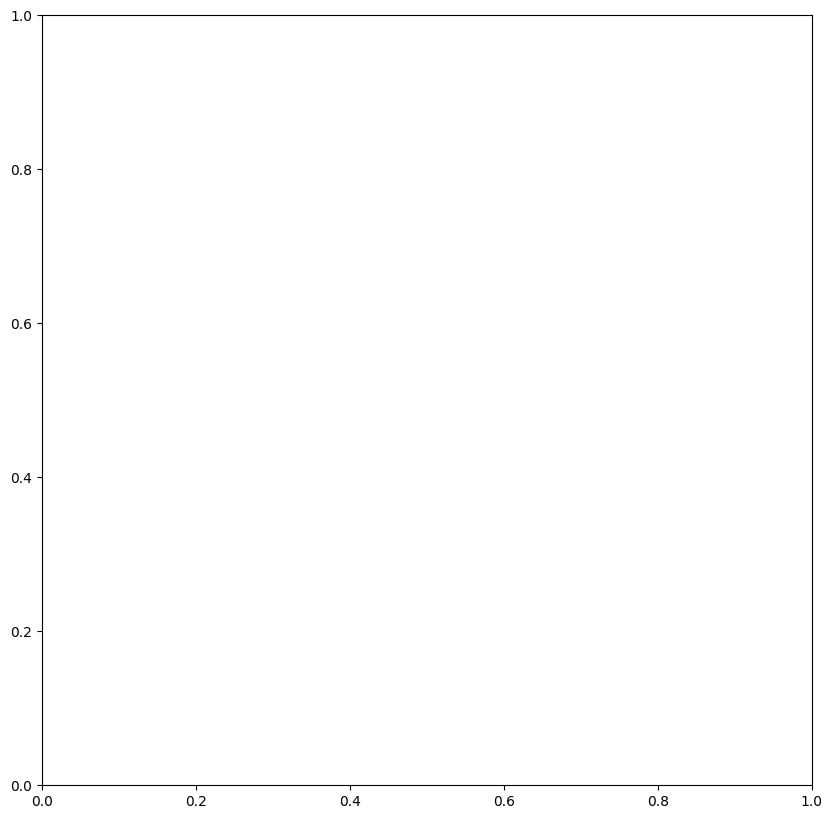

In [112]:
really_close_burbs.plot(column='distance_from_CBD', cmap='cool', legend=True);

I don't think that could be any easier!

You can see the list of [colour scale options here](http://matplotlib.org/users/colormaps.html)

What if you want to put some points onto the map? In this case we'll plot the centroids, but you can plot any points because they are using geographic coordinates.

/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_9354/1931185165.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  ax = really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True)
/var/folders/54/5zx48ts12076m8hd15w5htq80000gn/T/ipykernel_9354/1931185165.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  really_close_burbs.centroid.plot(ax=ax)


<Axes: >

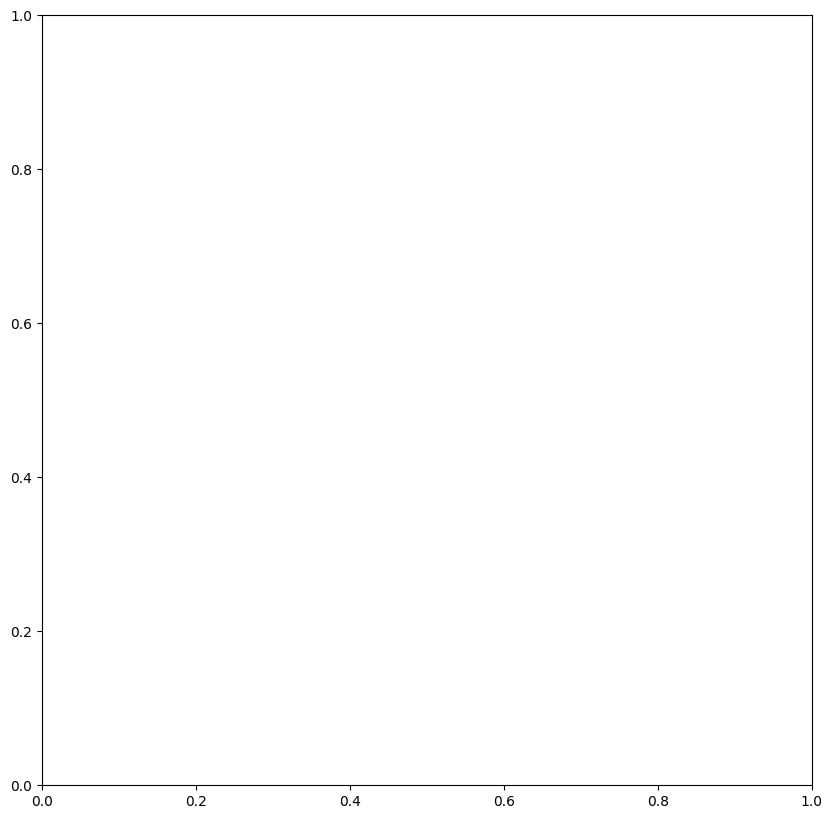

In [114]:
ax = really_close_burbs.plot(column='distance_from_CBD', cmap='cool', legend=True)
really_close_burbs.centroid.plot(ax=ax)

## Handy links

* [Geopandas docs](http://geopandas.readthedocs.io)
* [Geopandas on GitHib](https://github.com/geopandas/geopandas)
* [Another map making tutorial](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html)
* [MatPlotLib colour scale options](http://matplotlib.org/users/colormaps.html)

I'd love to hear if you come across any other useful things!